In [1]:
import torch
import datasets, networks, sampling, completion, evaluation
import matplotlib.pyplot as plt
from torch import nn

In [2]:
#HYPERPARAMETERS
num_epochs = 50

# TODO Select a optimizer. [ 'adam', 'adamw', 'rmsprop' ]
optimizer_option = 'adamw'


# TODO Select a batch size.
batch_size = 16

# TODO Select a learning rate.
lr = 1e-3


num_residual = 15
num_kernels = 128

100.0%


Extracting data\cifar-10-python.tar.gz to data


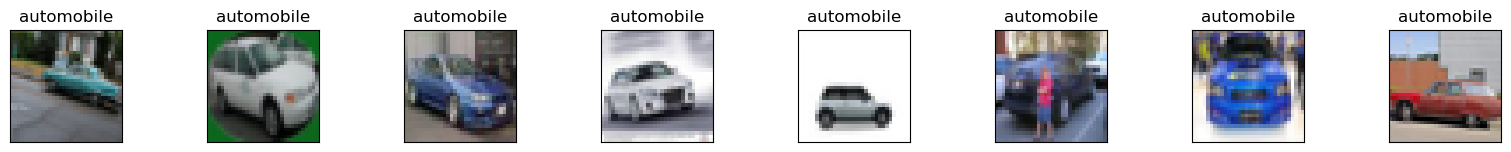

In [3]:
ds = datasets.Dataset('subset', batch_size=batch_size,label=1)
training_data = ds.get_train_data_loader()
test_data = ds.get_test_data_loader()

ds.visualize_dataset(training_data,8)

Using device: cuda:0
Epoch:   1/ 50, Batch     1, Loss: 5.6221
Epoch:   1/ 50, Batch   101, Loss: 4.6982
Epoch:   1/ 50, Batch   201, Loss: 4.3727
Epoch:   1/ 50, Batch   301, Loss: 4.2562
-----------------------------------------
Epoch:   1 took 24.65s
Epoch:   1, Test Loss: 4.2185
-----------------------------------------


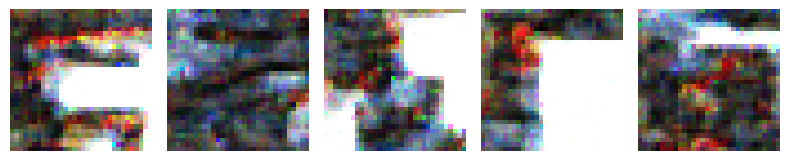

Epoch:   2/ 50, Batch     1, Loss: 4.1605
Epoch:   2/ 50, Batch   101, Loss: 4.1937
Epoch:   2/ 50, Batch   201, Loss: 4.1958
Epoch:   2/ 50, Batch   301, Loss: 4.1337
-----------------------------------------
Epoch:   2 took 24.12s
Epoch:   2, Test Loss: 4.0377
-----------------------------------------


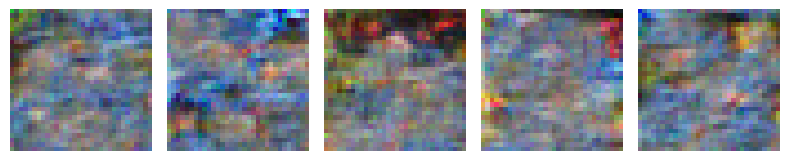

Epoch:   3/ 50, Batch     1, Loss: 4.0534
Epoch:   3/ 50, Batch   101, Loss: 4.0771
Epoch:   3/ 50, Batch   201, Loss: 4.0476
Epoch:   3/ 50, Batch   301, Loss: 4.0539
-----------------------------------------
Epoch:   3 took 24.21s
Epoch:   3, Test Loss: 3.9812
-----------------------------------------


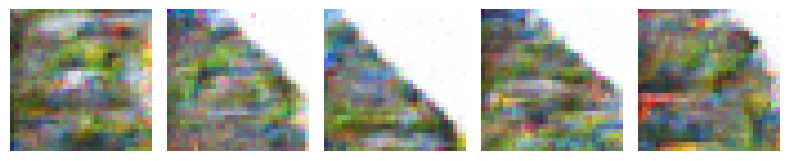

Epoch:   4/ 50, Batch     1, Loss: 3.9985
Epoch:   4/ 50, Batch   101, Loss: 4.0381
Epoch:   4/ 50, Batch   201, Loss: 3.9895
Epoch:   4/ 50, Batch   301, Loss: 3.9624
-----------------------------------------
Epoch:   4 took 23.93s
Epoch:   4, Test Loss: 3.8585
-----------------------------------------


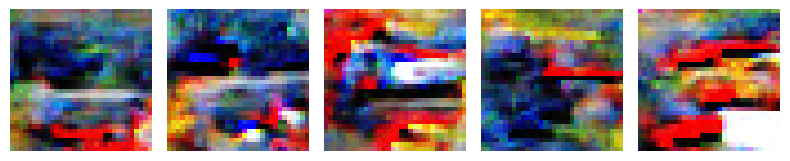

Epoch:   5/ 50, Batch     1, Loss: 3.8514
Epoch:   5/ 50, Batch   101, Loss: 3.9871
Epoch:   5/ 50, Batch   201, Loss: 3.9604
Epoch:   5/ 50, Batch   301, Loss: 3.9699
-----------------------------------------
Epoch:   5 took 23.95s
Epoch:   5, Test Loss: 4.0188
-----------------------------------------


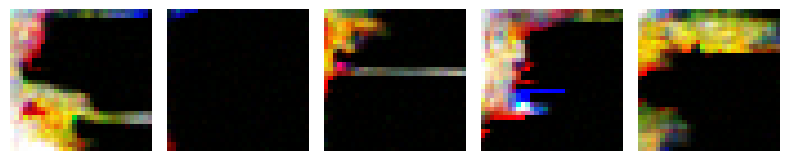

Epoch:   6/ 50, Batch     1, Loss: 3.8343
Epoch:   6/ 50, Batch   101, Loss: 3.9852
Epoch:   6/ 50, Batch   201, Loss: 3.9000
Epoch:   6/ 50, Batch   301, Loss: 3.8658
-----------------------------------------
Epoch:   6 took 24.18s
Epoch:   6, Test Loss: 4.0200
-----------------------------------------


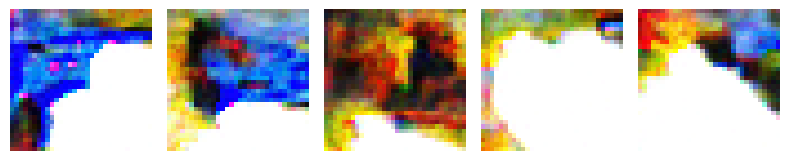

Epoch:   7/ 50, Batch     1, Loss: 3.9454
Epoch:   7/ 50, Batch   101, Loss: 3.9284
Epoch:   7/ 50, Batch   201, Loss: 3.8692
Epoch:   7/ 50, Batch   301, Loss: 3.8755
-----------------------------------------
Epoch:   7 took 24.15s
Epoch:   7, Test Loss: 3.8358
-----------------------------------------


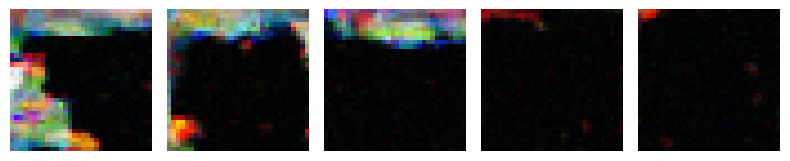

Epoch:   8/ 50, Batch     1, Loss: 3.9510
Epoch:   8/ 50, Batch   101, Loss: 3.9016
Epoch:   8/ 50, Batch   201, Loss: 3.8253
Epoch:   8/ 50, Batch   301, Loss: 3.8431
-----------------------------------------
Epoch:   8 took 24.10s
Epoch:   8, Test Loss: 3.8709
-----------------------------------------


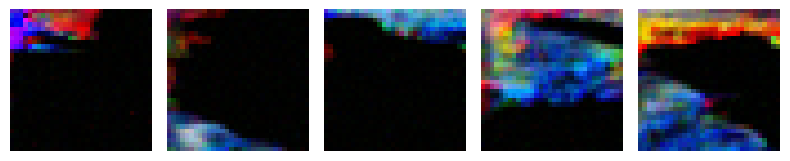

Epoch:   9/ 50, Batch     1, Loss: 3.8024
Epoch:   9/ 50, Batch   101, Loss: 3.8272
Epoch:   9/ 50, Batch   201, Loss: 3.7830
Epoch:   9/ 50, Batch   301, Loss: 3.8232
-----------------------------------------
Epoch:   9 took 24.31s
Epoch:   9, Test Loss: 3.7260
-----------------------------------------


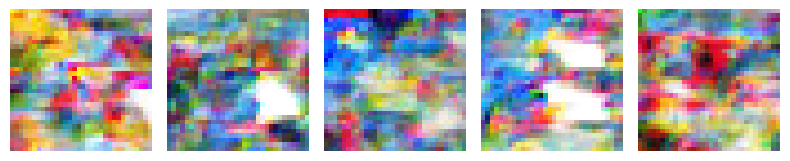

Epoch:  10/ 50, Batch     1, Loss: 3.6576
Epoch:  10/ 50, Batch   101, Loss: 3.7771
Epoch:  10/ 50, Batch   201, Loss: 3.7604
Epoch:  10/ 50, Batch   301, Loss: 3.7679
-----------------------------------------
Epoch:  10 took 28.70s
Epoch:  10, Test Loss: 3.7363
-----------------------------------------


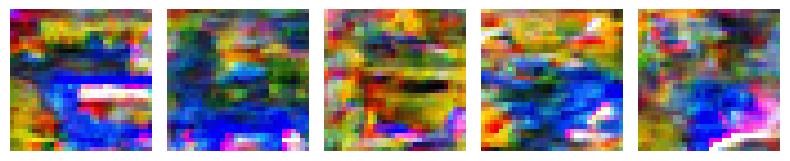

Epoch:  11/ 50, Batch     1, Loss: 3.6836
Epoch:  11/ 50, Batch   101, Loss: 3.7881
Epoch:  11/ 50, Batch   201, Loss: 3.8015
Epoch:  11/ 50, Batch   301, Loss: 3.7537
-----------------------------------------
Epoch:  11 took 28.68s
Epoch:  11, Test Loss: 3.6735
-----------------------------------------


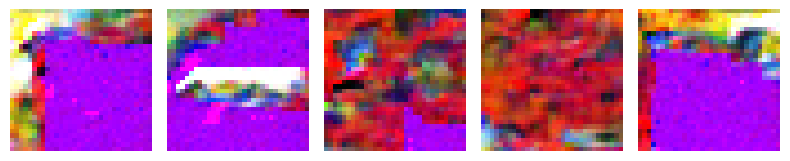

Epoch:  12/ 50, Batch     1, Loss: 3.5826
Epoch:  12/ 50, Batch   101, Loss: 3.7444
Epoch:  12/ 50, Batch   201, Loss: 3.7486
Epoch:  12/ 50, Batch   301, Loss: 3.7309
-----------------------------------------
Epoch:  12 took 28.57s
Epoch:  12, Test Loss: 3.6603
-----------------------------------------


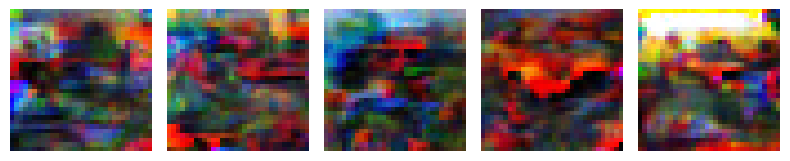

Epoch:  13/ 50, Batch     1, Loss: 3.6434
Epoch:  13/ 50, Batch   101, Loss: 3.6979
Epoch:  13/ 50, Batch   201, Loss: 3.7489
Epoch:  13/ 50, Batch   301, Loss: 3.7148
-----------------------------------------
Epoch:  13 took 28.83s
Epoch:  13, Test Loss: 3.6634
-----------------------------------------


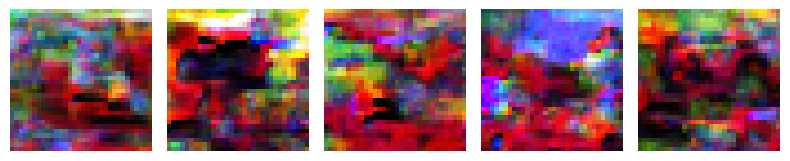

Epoch:  14/ 50, Batch     1, Loss: 3.5810
Epoch:  14/ 50, Batch   101, Loss: 3.6975
Epoch:  14/ 50, Batch   201, Loss: 3.7199
Epoch:  14/ 50, Batch   301, Loss: 3.7026
-----------------------------------------
Epoch:  14 took 28.69s
Epoch:  14, Test Loss: 3.6358
-----------------------------------------


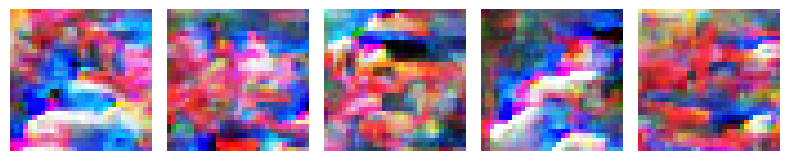

Epoch:  15/ 50, Batch     1, Loss: 3.6575
Epoch:  15/ 50, Batch   101, Loss: 3.7009
Epoch:  15/ 50, Batch   201, Loss: 3.6787
Epoch:  15/ 50, Batch   301, Loss: 3.7027
-----------------------------------------
Epoch:  15 took 28.77s
Epoch:  15, Test Loss: 3.6761
-----------------------------------------


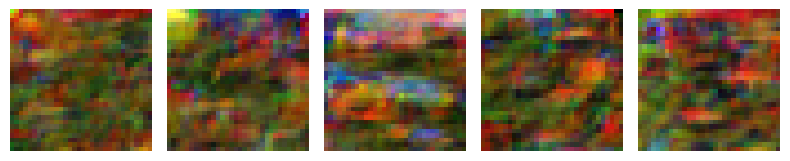

Epoch:  16/ 50, Batch     1, Loss: 3.6164
Epoch:  16/ 50, Batch   101, Loss: 3.6772
Epoch:  16/ 50, Batch   201, Loss: 3.6785
Epoch:  16/ 50, Batch   301, Loss: 3.6998
-----------------------------------------
Epoch:  16 took 28.88s
Epoch:  16, Test Loss: 3.7751
-----------------------------------------


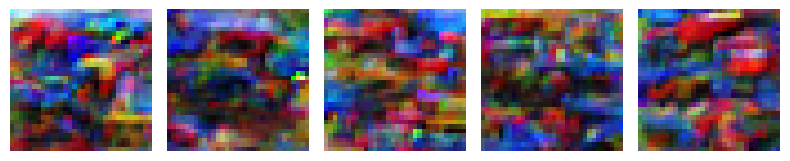

Epoch:  17/ 50, Batch     1, Loss: 3.7221
Epoch:  17/ 50, Batch   101, Loss: 3.6483
Epoch:  17/ 50, Batch   201, Loss: 3.6680
Epoch:  17/ 50, Batch   301, Loss: 3.6789
-----------------------------------------
Epoch:  17 took 28.80s
Epoch:  17, Test Loss: 3.6944
-----------------------------------------


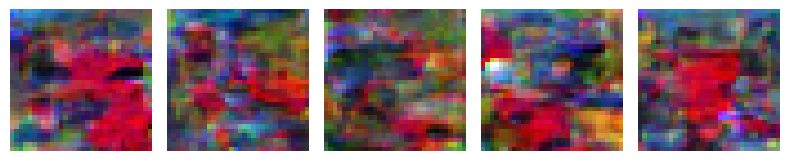

Epoch:  18/ 50, Batch     1, Loss: 3.6458
Epoch:  18/ 50, Batch   101, Loss: 3.6920
Epoch:  18/ 50, Batch   201, Loss: 3.6370
Epoch:  18/ 50, Batch   301, Loss: 3.6383
-----------------------------------------
Epoch:  18 took 28.81s
Epoch:  18, Test Loss: 3.9062
-----------------------------------------


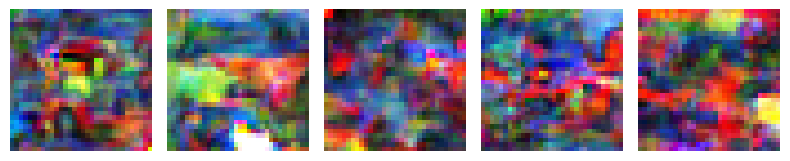

Epoch:  19/ 50, Batch     1, Loss: 3.5900
Epoch:  19/ 50, Batch   101, Loss: 3.6605
Epoch:  19/ 50, Batch   201, Loss: 3.6370
Epoch:  19/ 50, Batch   301, Loss: 3.6397
-----------------------------------------
Epoch:  19 took 28.76s
Epoch:  19, Test Loss: 3.6914
-----------------------------------------


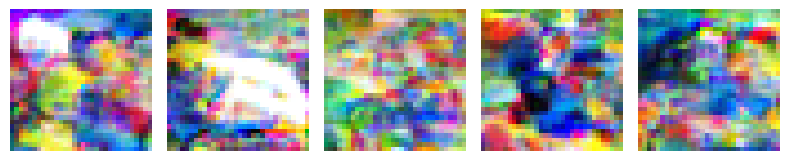

Epoch:  20/ 50, Batch     1, Loss: 3.6592
Epoch:  20/ 50, Batch   101, Loss: 3.6399
Epoch:  20/ 50, Batch   201, Loss: 3.6428
Epoch:  20/ 50, Batch   301, Loss: 3.6249
-----------------------------------------
Epoch:  20 took 23.67s
Epoch:  20, Test Loss: 3.6493
-----------------------------------------


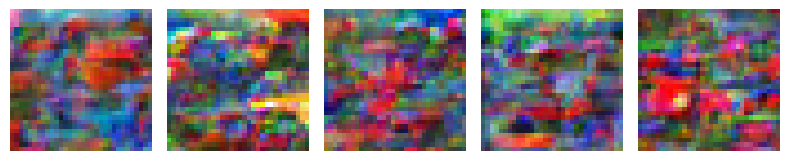

Epoch:  21/ 50, Batch     1, Loss: 3.6566
Epoch:  21/ 50, Batch   101, Loss: 3.6198
Epoch:  21/ 50, Batch   201, Loss: 3.6433
Epoch:  21/ 50, Batch   301, Loss: 3.6046
-----------------------------------------
Epoch:  21 took 23.77s
Epoch:  21, Test Loss: 3.6178
-----------------------------------------


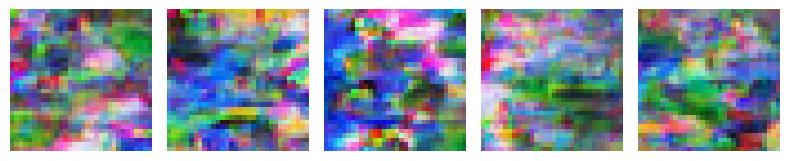

Epoch:  22/ 50, Batch     1, Loss: 3.4752
Epoch:  22/ 50, Batch   101, Loss: 3.6114
Epoch:  22/ 50, Batch   201, Loss: 3.6085
Epoch:  22/ 50, Batch   301, Loss: 3.6130
-----------------------------------------
Epoch:  22 took 23.82s
Epoch:  22, Test Loss: 3.5863
-----------------------------------------


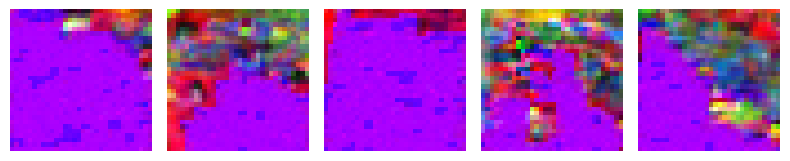

Epoch:  23/ 50, Batch     1, Loss: 3.5169
Epoch:  23/ 50, Batch   101, Loss: 3.5903
Epoch:  23/ 50, Batch   201, Loss: 3.6030
Epoch:  23/ 50, Batch   301, Loss: 3.5801
-----------------------------------------
Epoch:  23 took 25.39s
Epoch:  23, Test Loss: 3.6394
-----------------------------------------


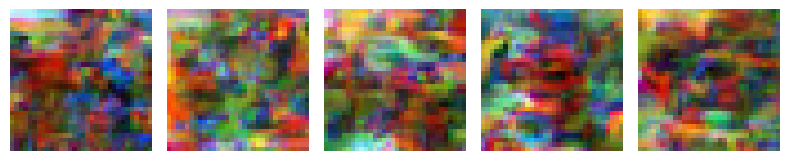

Epoch:  24/ 50, Batch     1, Loss: 3.5498
Epoch:  24/ 50, Batch   101, Loss: 3.5717
Epoch:  24/ 50, Batch   201, Loss: 3.6323
Epoch:  24/ 50, Batch   301, Loss: 3.5920
-----------------------------------------
Epoch:  24 took 24.27s
Epoch:  24, Test Loss: 3.6133
-----------------------------------------


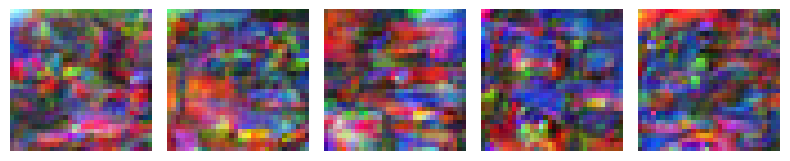

Epoch:  25/ 50, Batch     1, Loss: 3.6418
Epoch:  25/ 50, Batch   101, Loss: 3.5813
Epoch:  25/ 50, Batch   201, Loss: 3.6080
Epoch:  25/ 50, Batch   301, Loss: 3.5995
-----------------------------------------
Epoch:  25 took 24.23s
Epoch:  25, Test Loss: 3.6952
-----------------------------------------


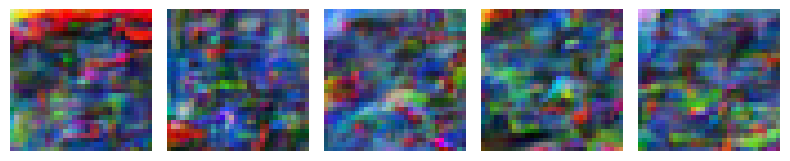

Epoch:  26/ 50, Batch     1, Loss: 3.5108
Epoch:  26/ 50, Batch   101, Loss: 3.5913
Epoch:  26/ 50, Batch   201, Loss: 3.5881
Epoch:  26/ 50, Batch   301, Loss: 3.5866
-----------------------------------------
Epoch:  26 took 24.22s
Epoch:  26, Test Loss: 3.5632
-----------------------------------------


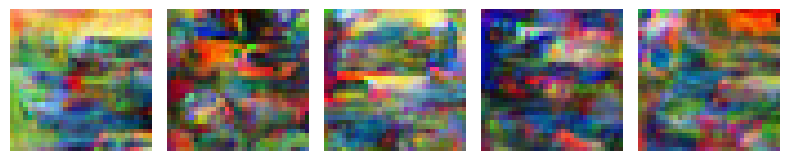

Epoch:  27/ 50, Batch     1, Loss: 3.3987
Epoch:  27/ 50, Batch   101, Loss: 3.6149
Epoch:  27/ 50, Batch   201, Loss: 3.5780
Epoch:  27/ 50, Batch   301, Loss: 3.5681
-----------------------------------------
Epoch:  27 took 24.20s
Epoch:  27, Test Loss: 3.5627
-----------------------------------------


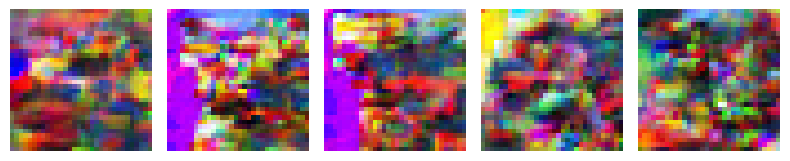

Epoch:  28/ 50, Batch     1, Loss: 3.5479
Epoch:  28/ 50, Batch   101, Loss: 3.5428
Epoch:  28/ 50, Batch   201, Loss: 3.5499
Epoch:  28/ 50, Batch   301, Loss: 3.5720
-----------------------------------------
Epoch:  28 took 24.70s
Epoch:  28, Test Loss: 3.5804
-----------------------------------------


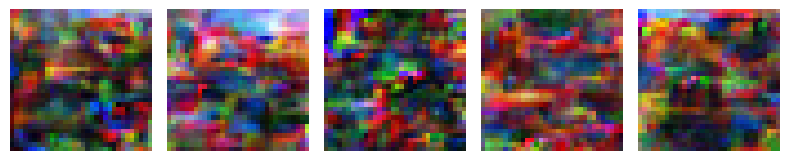

Epoch:  29/ 50, Batch     1, Loss: 3.5248
Epoch:  29/ 50, Batch   101, Loss: 3.5451
Epoch:  29/ 50, Batch   201, Loss: 3.5551
Epoch:  29/ 50, Batch   301, Loss: 3.5619
-----------------------------------------
Epoch:  29 took 24.70s
Epoch:  29, Test Loss: 3.5334
-----------------------------------------


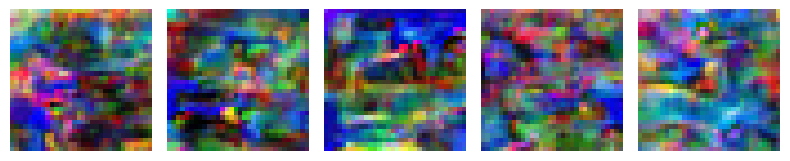

Epoch:  30/ 50, Batch     1, Loss: 3.4864
Epoch:  30/ 50, Batch   101, Loss: 3.5466
Epoch:  30/ 50, Batch   201, Loss: 3.5633
Epoch:  30/ 50, Batch   301, Loss: 3.5675
-----------------------------------------
Epoch:  30 took 24.20s
Epoch:  30, Test Loss: 3.5783
-----------------------------------------


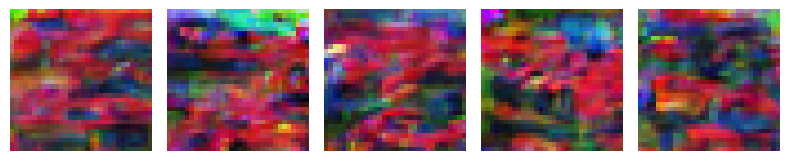

Epoch:  31/ 50, Batch     1, Loss: 3.4225
Epoch:  31/ 50, Batch   101, Loss: 3.5751
Epoch:  31/ 50, Batch   201, Loss: 3.5517
Epoch:  31/ 50, Batch   301, Loss: 3.5483
-----------------------------------------
Epoch:  31 took 24.20s
Epoch:  31, Test Loss: 3.5535
-----------------------------------------


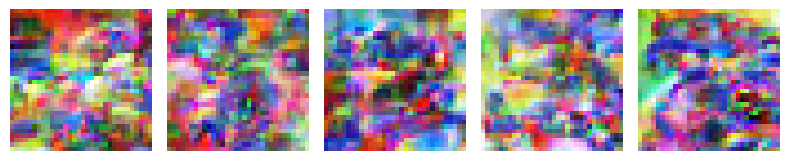

Epoch:  32/ 50, Batch     1, Loss: 3.4890
Epoch:  32/ 50, Batch   101, Loss: 3.5364
Epoch:  32/ 50, Batch   201, Loss: 3.5539
Epoch:  32/ 50, Batch   301, Loss: 3.5329
-----------------------------------------
Epoch:  32 took 24.22s
Epoch:  32, Test Loss: 3.5355
-----------------------------------------


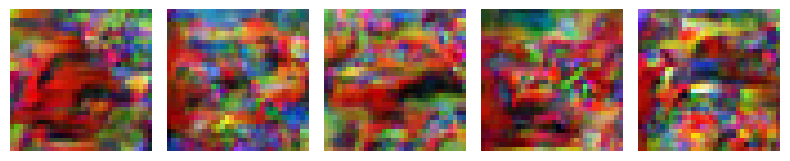

Epoch:  33/ 50, Batch     1, Loss: 3.6071
Epoch:  33/ 50, Batch   101, Loss: 3.5414
Epoch:  33/ 50, Batch   201, Loss: 3.5147
Epoch:  33/ 50, Batch   301, Loss: 3.5347
-----------------------------------------
Epoch:  33 took 24.77s
Epoch:  33, Test Loss: 3.5411
-----------------------------------------


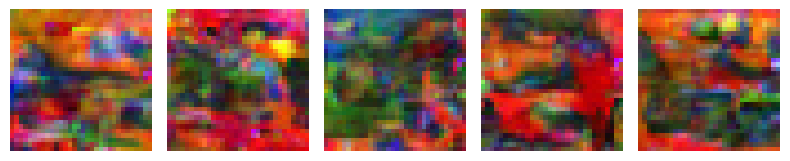

Epoch:  34/ 50, Batch     1, Loss: 3.4333
Epoch:  34/ 50, Batch   101, Loss: 3.5445
Epoch:  34/ 50, Batch   201, Loss: 3.5289
Epoch:  34/ 50, Batch   301, Loss: 3.5305
-----------------------------------------
Epoch:  34 took 25.11s
Epoch:  34, Test Loss: 3.5032
-----------------------------------------


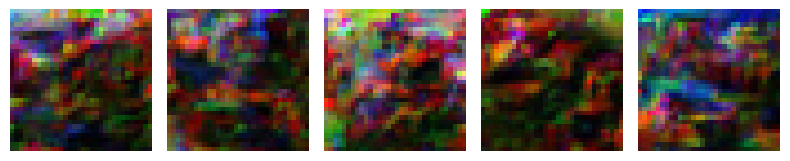

Epoch:  35/ 50, Batch     1, Loss: 3.4545
Epoch:  35/ 50, Batch   101, Loss: 3.5173
Epoch:  35/ 50, Batch   201, Loss: 3.5241
Epoch:  35/ 50, Batch   301, Loss: 3.5302
-----------------------------------------
Epoch:  35 took 25.36s
Epoch:  35, Test Loss: 3.5848
-----------------------------------------


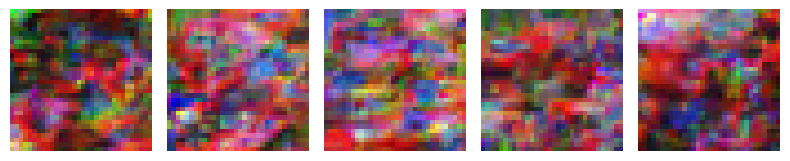

Epoch:  36/ 50, Batch     1, Loss: 3.2964
Epoch:  36/ 50, Batch   101, Loss: 3.4998
Epoch:  36/ 50, Batch   201, Loss: 3.5449
Epoch:  36/ 50, Batch   301, Loss: 3.5355
-----------------------------------------
Epoch:  36 took 25.33s
Epoch:  36, Test Loss: 3.6180
-----------------------------------------


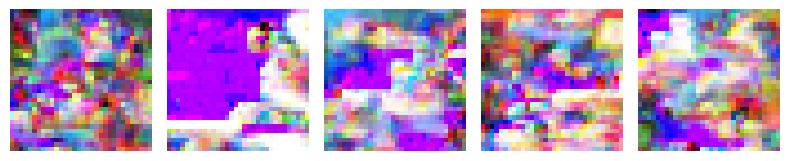

Epoch:  37/ 50, Batch     1, Loss: 3.5463
Epoch:  37/ 50, Batch   101, Loss: 3.5137
Epoch:  37/ 50, Batch   201, Loss: 3.5059
Epoch:  37/ 50, Batch   301, Loss: 3.5205
-----------------------------------------
Epoch:  37 took 25.37s
Epoch:  37, Test Loss: 3.6004
-----------------------------------------


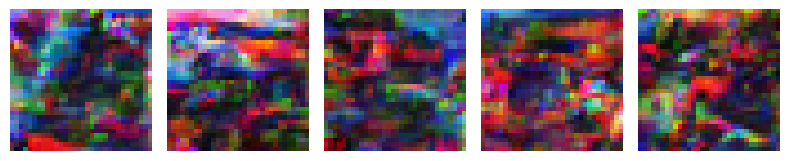

Epoch:  38/ 50, Batch     1, Loss: 3.5518
Epoch:  38/ 50, Batch   101, Loss: 3.5281
Epoch:  38/ 50, Batch   201, Loss: 3.5253
Epoch:  38/ 50, Batch   301, Loss: 3.5405
-----------------------------------------
Epoch:  38 took 25.08s
Epoch:  38, Test Loss: 3.5359
-----------------------------------------


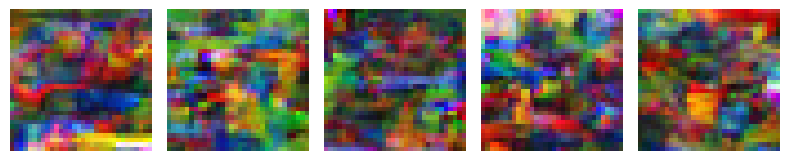

Epoch:  39/ 50, Batch     1, Loss: 3.5916
Epoch:  39/ 50, Batch   101, Loss: 3.5075
Epoch:  39/ 50, Batch   201, Loss: 3.5433
Epoch:  39/ 50, Batch   301, Loss: 3.4910
-----------------------------------------
Epoch:  39 took 25.08s
Epoch:  39, Test Loss: 3.5369
-----------------------------------------


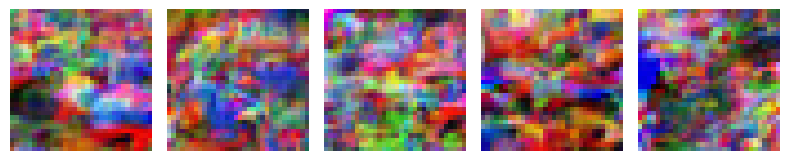

Epoch:  40/ 50, Batch     1, Loss: 3.5239
Epoch:  40/ 50, Batch   101, Loss: 3.5050
Epoch:  40/ 50, Batch   201, Loss: 3.5005
Epoch:  40/ 50, Batch   301, Loss: 3.5320
-----------------------------------------
Epoch:  40 took 25.08s
Epoch:  40, Test Loss: 3.5299
-----------------------------------------


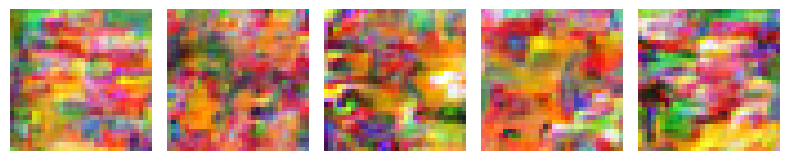

Epoch:  41/ 50, Batch     1, Loss: 3.5683
Epoch:  41/ 50, Batch   101, Loss: 3.4920
Epoch:  41/ 50, Batch   201, Loss: 3.5025
Epoch:  41/ 50, Batch   301, Loss: 3.4922
-----------------------------------------
Epoch:  41 took 25.07s
Epoch:  41, Test Loss: 3.5108
-----------------------------------------


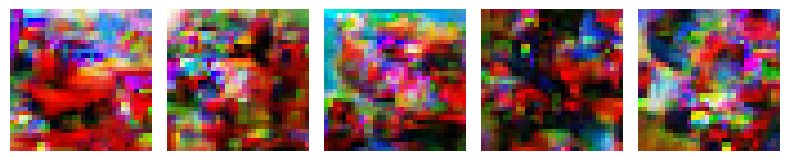

Epoch:  42/ 50, Batch     1, Loss: 3.5210
Epoch:  42/ 50, Batch   101, Loss: 3.4900
Epoch:  42/ 50, Batch   201, Loss: 3.4785
Epoch:  42/ 50, Batch   301, Loss: 3.4997
-----------------------------------------
Epoch:  42 took 25.09s
Epoch:  42, Test Loss: 3.5978
-----------------------------------------


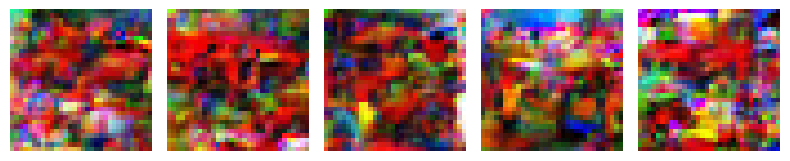

Epoch:  43/ 50, Batch     1, Loss: 3.3253
Epoch:  43/ 50, Batch   101, Loss: 3.4776
Epoch:  43/ 50, Batch   201, Loss: 3.4935
Epoch:  43/ 50, Batch   301, Loss: 3.5050
-----------------------------------------
Epoch:  43 took 25.31s
Epoch:  43, Test Loss: 3.4961
-----------------------------------------


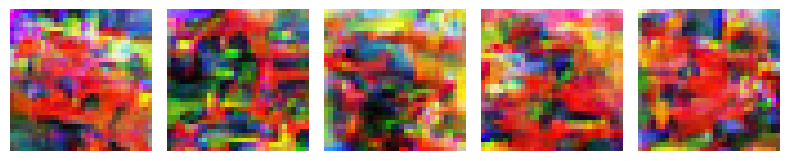

Epoch:  44/ 50, Batch     1, Loss: 3.4397
Epoch:  44/ 50, Batch   101, Loss: 3.4754
Epoch:  44/ 50, Batch   201, Loss: 3.4684
Epoch:  44/ 50, Batch   301, Loss: 3.5255
-----------------------------------------
Epoch:  44 took 24.51s
Epoch:  44, Test Loss: 3.4939
-----------------------------------------


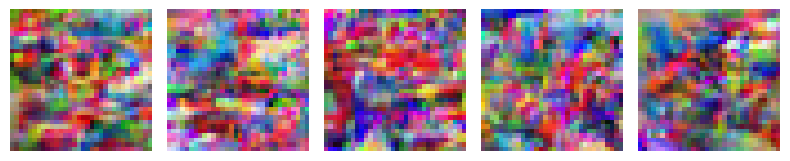

Epoch:  45/ 50, Batch     1, Loss: 3.4716
Epoch:  45/ 50, Batch   101, Loss: 3.4721
Epoch:  45/ 50, Batch   201, Loss: 3.4573
Epoch:  45/ 50, Batch   301, Loss: 3.4986
-----------------------------------------
Epoch:  45 took 24.25s
Epoch:  45, Test Loss: 3.5657
-----------------------------------------


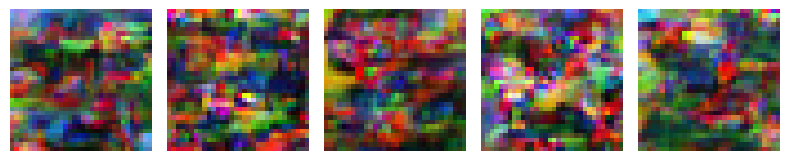

Epoch:  46/ 50, Batch     1, Loss: 3.3031
Epoch:  46/ 50, Batch   101, Loss: 3.5054
Epoch:  46/ 50, Batch   201, Loss: 3.4948
Epoch:  46/ 50, Batch   301, Loss: 3.4690
-----------------------------------------
Epoch:  46 took 24.27s
Epoch:  46, Test Loss: 3.5545
-----------------------------------------


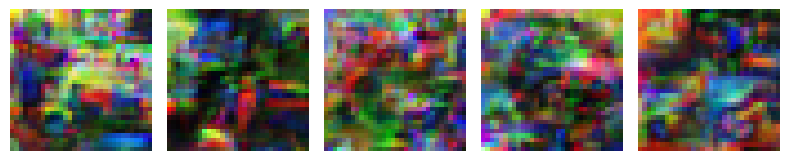

Epoch:  47/ 50, Batch     1, Loss: 3.5935
Epoch:  47/ 50, Batch   101, Loss: 3.4870
Epoch:  47/ 50, Batch   201, Loss: 3.4696
Epoch:  47/ 50, Batch   301, Loss: 3.4621
-----------------------------------------
Epoch:  47 took 26.14s
Epoch:  47, Test Loss: 3.4963
-----------------------------------------


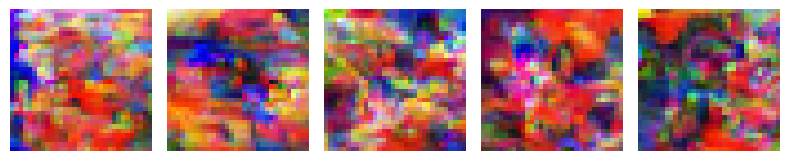

Epoch:  48/ 50, Batch     1, Loss: 3.4457
Epoch:  48/ 50, Batch   101, Loss: 3.4720
Epoch:  48/ 50, Batch   201, Loss: 3.4674
Epoch:  48/ 50, Batch   301, Loss: 3.4717
-----------------------------------------
Epoch:  48 took 30.38s
Epoch:  48, Test Loss: 3.6275
-----------------------------------------


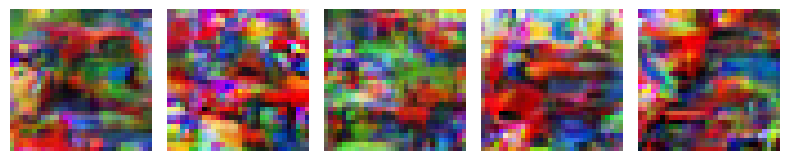

Epoch:  49/ 50, Batch     1, Loss: 3.3593
Epoch:  49/ 50, Batch   101, Loss: 3.4785
Epoch:  49/ 50, Batch   201, Loss: 3.4962
Epoch:  49/ 50, Batch   301, Loss: 3.4780
-----------------------------------------
Epoch:  49 took 30.34s
Epoch:  49, Test Loss: 3.4676
-----------------------------------------


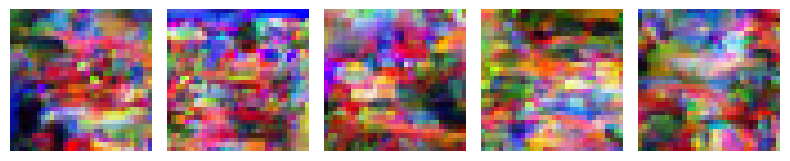

Epoch:  50/ 50, Batch     1, Loss: 3.4523
Epoch:  50/ 50, Batch   101, Loss: 3.4465
Epoch:  50/ 50, Batch   201, Loss: 3.4844
Epoch:  50/ 50, Batch   301, Loss: 3.4515
-----------------------------------------
Epoch:  50 took 30.34s
Epoch:  50, Test Loss: 3.5456
-----------------------------------------


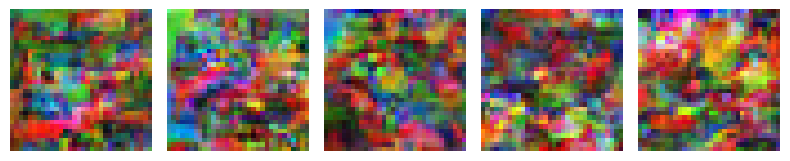

Training took 3058.08s


In [4]:
# Training
import time
from torch.optim import Adam, AdamW, RMSprop, SGD 
from torch.optim.lr_scheduler import ExponentialLR

PixelCNN = networks.PixelCNN(num_kernels=num_kernels, num_residual=num_residual)

device = torch.device('cuda:0')
print(f'Using device: {device}')
print('=========================================')

PixelCNN.to(device)

learning_rates = []
train_loss_curve = []
test_loss_curve = []
train_loss_epochs = []
test_loss_epochs = []
optimizer = None

# Select optimizer
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(PixelCNN.parameters(), lr)
  
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(PixelCNN.parameters(), lr)
  
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(PixelCNN.parameters(), lr)
  
else:
  optimizer = torch.optim.SGD(PixelCNN.parameters(), lr, momentum=0.9)  


scheduler = scheduler = ExponentialLR(optimizer, gamma=0.999977)


overall_start_time = time.time()

# training loop
for epoch in range(num_epochs):

  epoch_start_time = time.time()
  # Switch to training mode.
  PixelCNN.train()

  losses = []
  batch_idx = 0

  for images, labels in training_data:

    images = images.to(device)
    output = PixelCNN(images)

    images = images.view(-1)
    images = images*255
  
    output = torch.reshape(output, (batch_size, 256, 3, 32, 32))
    output = output.permute(0,2,3,4,1).contiguous().view(-1, 256)

    loss = nn.functional.cross_entropy(output, images.long())
    loss.backward()
    torch.nn.utils.clip_grad_norm_(PixelCNN.parameters(), 1)
  
    optimizer.step()
    for param_group in optimizer.param_groups:
      learning_rates.append(param_group['lr'])
    optimizer.zero_grad()


    losses.append(loss.detach().clone())

    if batch_idx % 100 == 0:
      average_loss = torch.stack(losses).mean().item()
      train_loss_curve.append(average_loss)
      train_loss_epochs.append(epoch + 1)
      losses = []
      print(f'Epoch: {epoch + 1:3d}/{num_epochs:3d}, Batch {batch_idx + 1:5d}, Loss: {average_loss:.4f}')
    batch_idx += 1

  scheduler.step()
  epoch_end_time = time.time()
  print('-----------------------------------------')
  print(f'Epoch: {epoch + 1:3d} took {epoch_end_time - epoch_start_time:.2f}s')
  test_loss = evaluation.evaluate(model=PixelCNN, test_data_loader=test_data, device=device, batch_size=batch_size)
  test_loss_curve.append(test_loss)
  test_loss_epochs.append(epoch + 1)
  print(f'Epoch: {epoch + 1:3d}, Test Loss: {test_loss:.4f}')
  print('-----------------------------------------')
  

  samples = sampling.sample(PixelCNN, num_samples=5)
  sampling.save_samples(samples)
  

overall_end_time = time.time()
print('=========================================')
print(f'Training took {overall_end_time - overall_start_time:.2f}s')



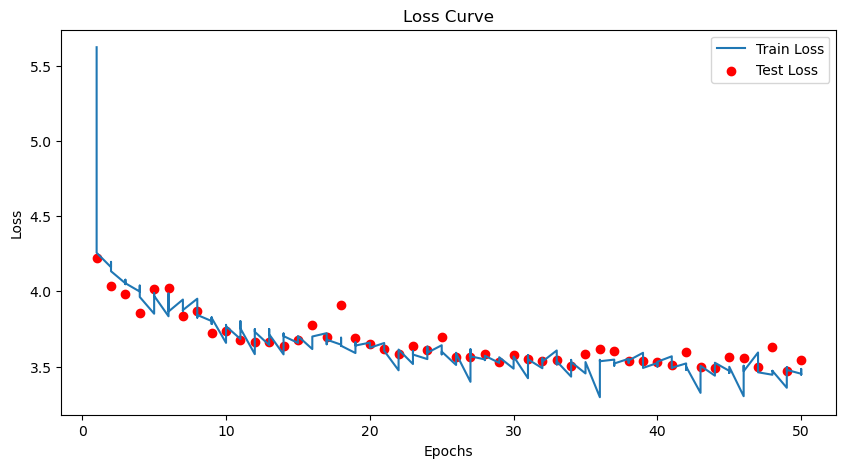

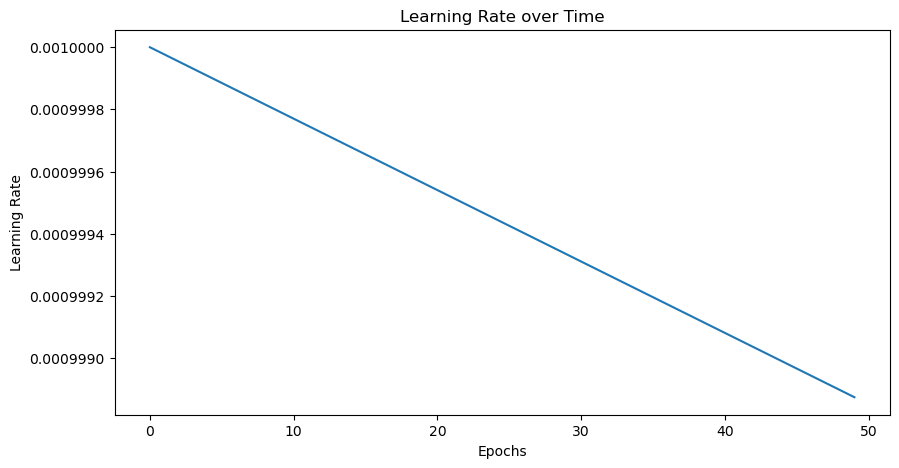

In [12]:

# Loss Curve Plot
plt.figure(figsize=(10, 5))
plt.plot(train_loss_epochs, train_loss_curve, label='Train Loss')
plt.scatter(test_loss_epochs, test_loss_curve, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()



plt.show()

# Learning Rate Plot
num_batches = len(training_data)
learning_rates_res = [sum(learning_rates[i * num_batches:(i + 1) * num_batches]) / num_batches for i in range(num_epochs)]
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), learning_rates_res)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Time')
plt.show()

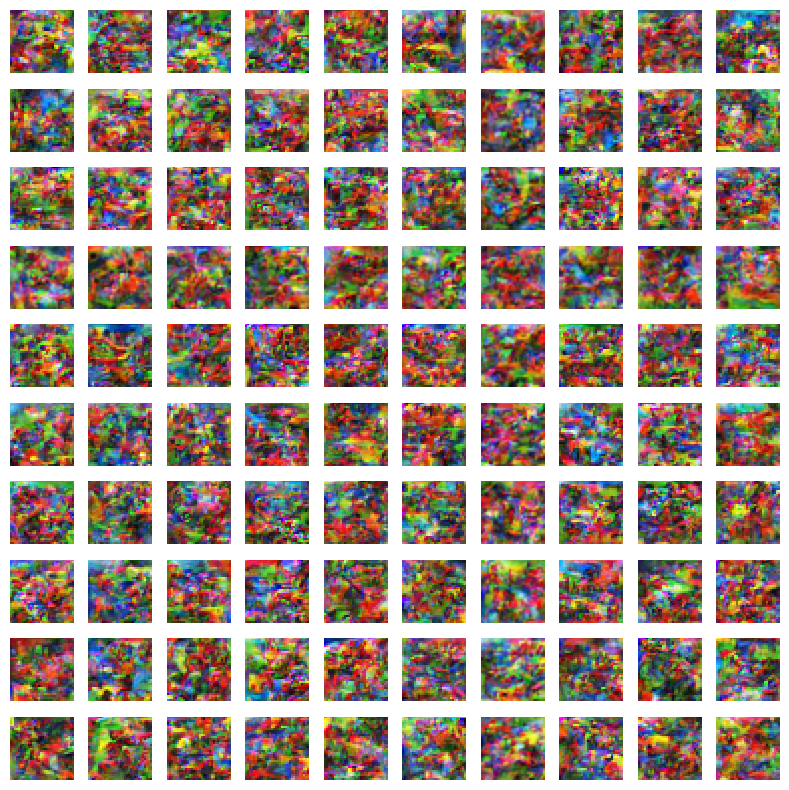

In [13]:
samples = sampling.sample(PixelCNN, num_samples=100)
sampling.save_samples(samples, filename="Car_Samples")

In [7]:
torch.save(PixelCNN.state_dict(), 'PixelCNN_cifar10.pth')

In [8]:
PixelCNN = networks.PixelCNN(num_kernels=num_kernels, num_residual=num_residual)
PixelCNN.to(torch.device("cuda"))
PixelCNN.load_state_dict(torch.load("PixelCNN_cifar10.pth"))

<All keys matched successfully>

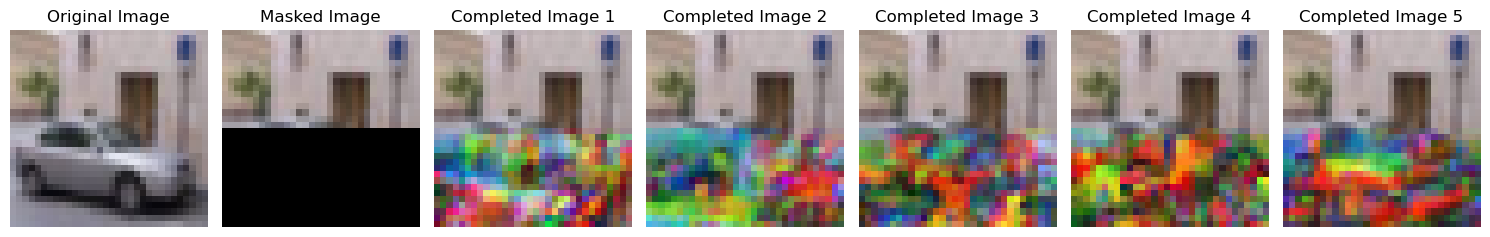

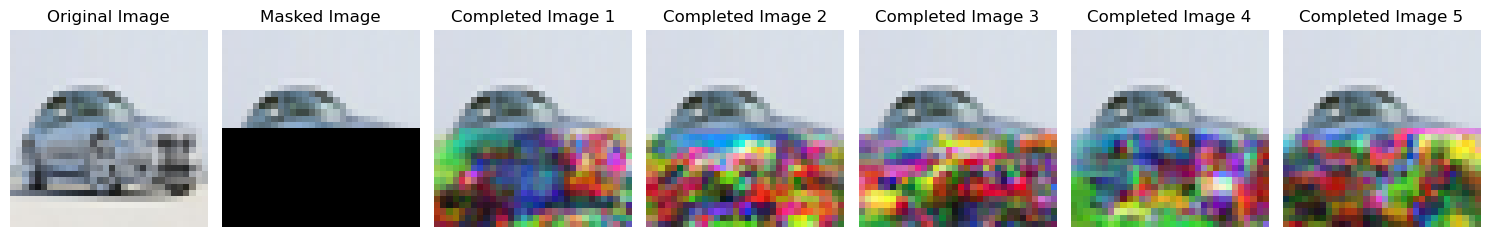

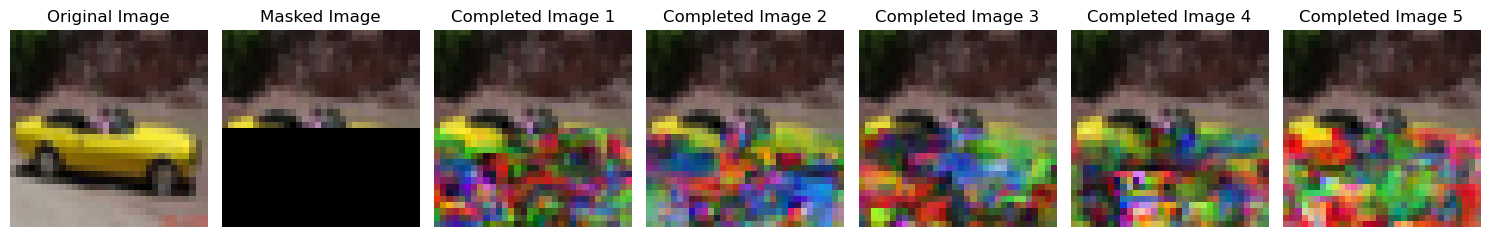

In [9]:
for i in range(3):
    original_img = completion.get_random_image(ds)
    masked_img, mask = completion.mask_image(original_img)
    completed_img = completion.complete(PixelCNN, masked_img, mask)
    completion.plot_completed_images(original_img, masked_img, completed_img)


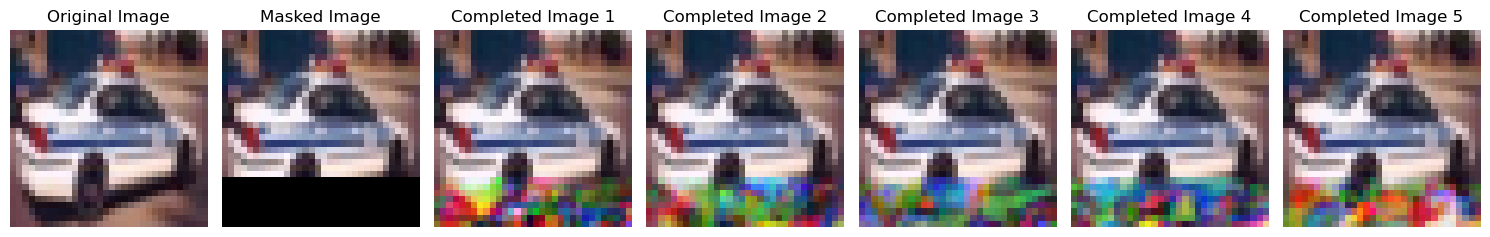

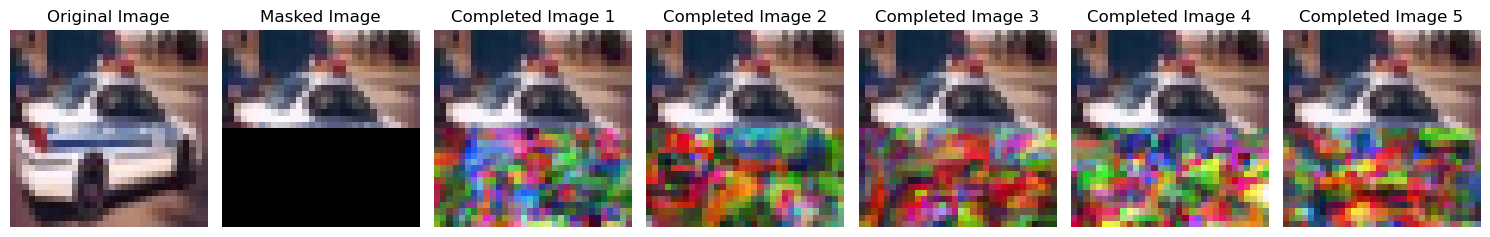

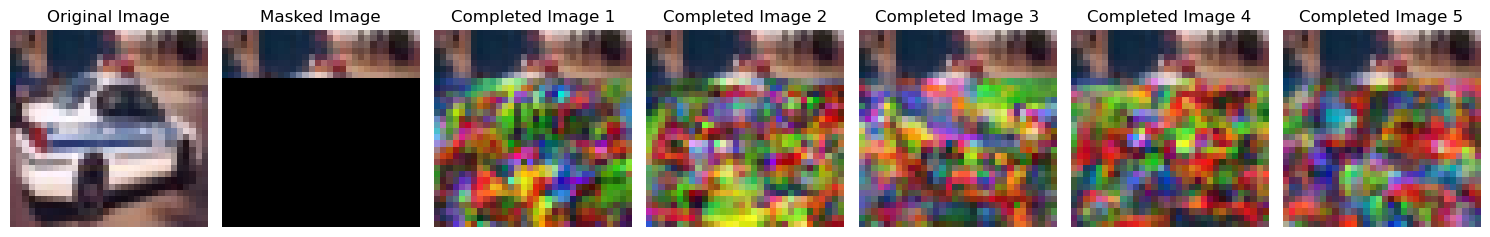

In [10]:
original_img = completion.get_random_image(ds)
for i in range(3):
    masked_img, mask = completion.mask_image(original_img, mask_fraction=0.25*(i+1))
    completed_img = completion.complete(PixelCNN, masked_img, mask)
    completion.plot_completed_images(original_img, masked_img, completed_img)